# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### My hypotheses

1. Applicants with a credit history will have a higher chance of being eligible for a loan
2. Applicants with more dependents
3. Applicants with higher education
4. Applicants with a high income/loan amount ratio

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
percent = df.isnull().sum().sort_values(ascending=False)/500000
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
Credit_History,50,0.000100
Self_Employed,32,0.000064
LoanAmount,22,0.000044
Dependents,15,0.000030
Loan_Amount_Term,14,0.000028
Gender,13,0.000026
Married,3,0.000006
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [4]:
# Checking how many have a credit history
df['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

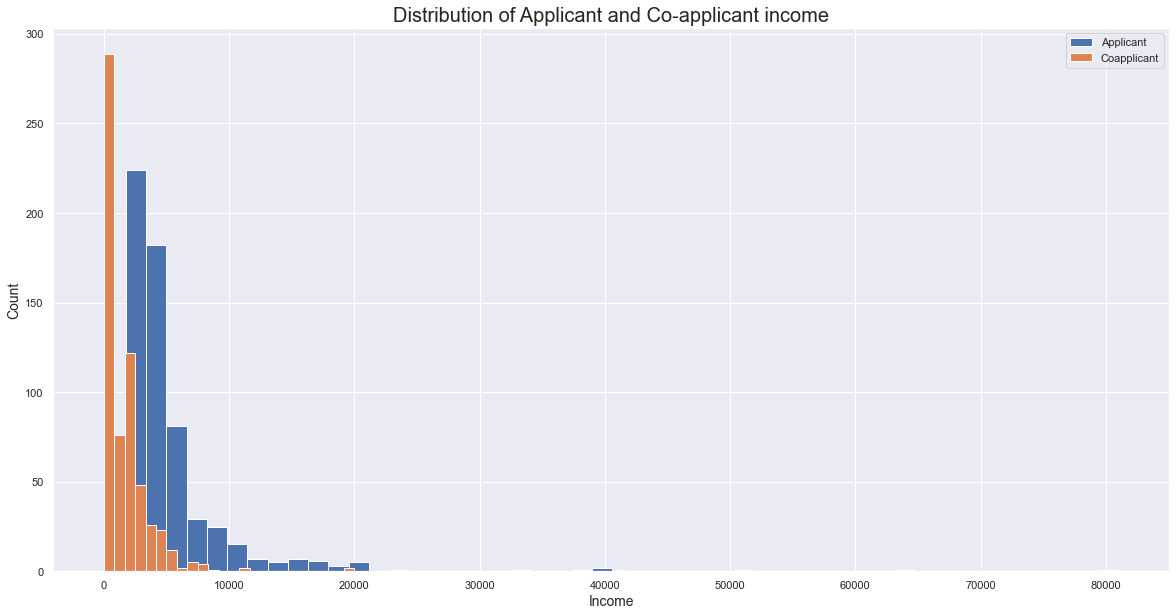

In [5]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,10)})
Applicant_Income = df['ApplicantIncome']
Coapplicant_Income = df['CoapplicantIncome']
plt.hist(Applicant_Income, bins = 50, label = 'Applicant')
plt.hist(Coapplicant_Income, bins = 50, label = 'Coapplicant')
plt.xlabel("Income", size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Applicant and Co-applicant income', size = 20)
plt.legend()
plt.show()

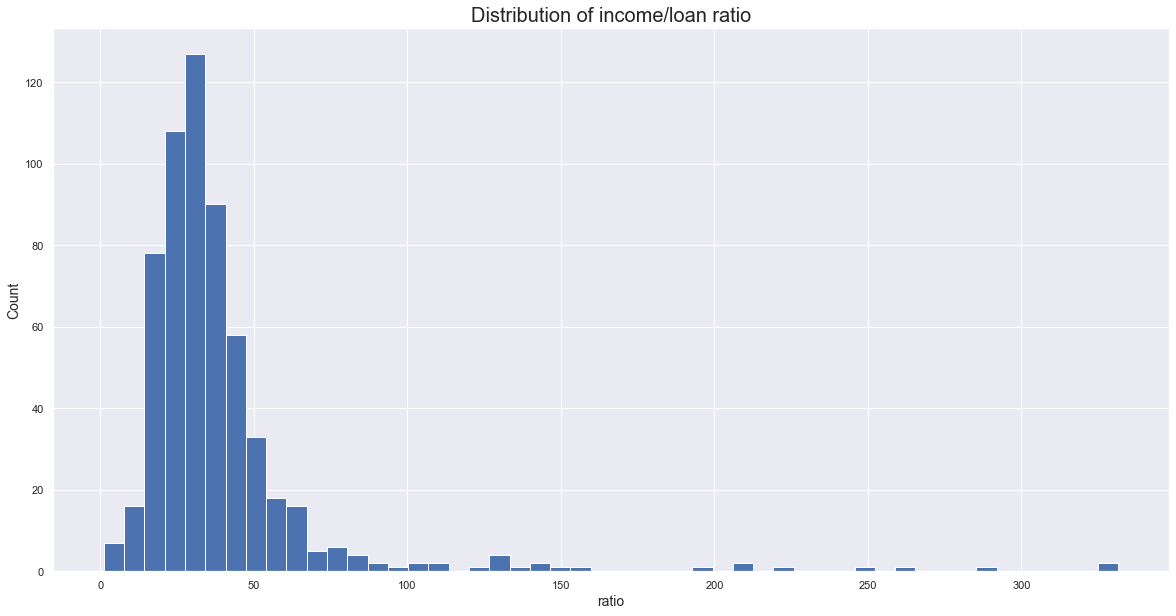

In [6]:
#Checking the distribution of income/loan ammount
ratio = df['ApplicantIncome'] / df['LoanAmount']
plt.hist(ratio, bins = 50)
plt.xlabel("ratio", size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of income/loan ratio', size = 20)
plt.show()

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
ratio.describe()

count    592.000000
mean      39.378181
std       34.360579
min        1.111111
25%       23.494469
50%       32.399387
75%       42.416013
max      331.550000
dtype: float64

### Based on the numerical variables
We can see there is a scew in both applicant and coapplicant income based on the graphs. Furthermore, we can see the mean and 50th percentile (median) are significantly different. This trend continues in the ratio we calculated with a smaller difference.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
column_list  = df.columns.tolist()
Categorical_variables = df.dtypes[column_list][df.dtypes[column_list] == object].index.tolist()
Categorical_variables.pop(0)

'Loan_ID'

In [10]:
Categorical_variables

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
for value in Categorical_variables:
    print(df[value].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

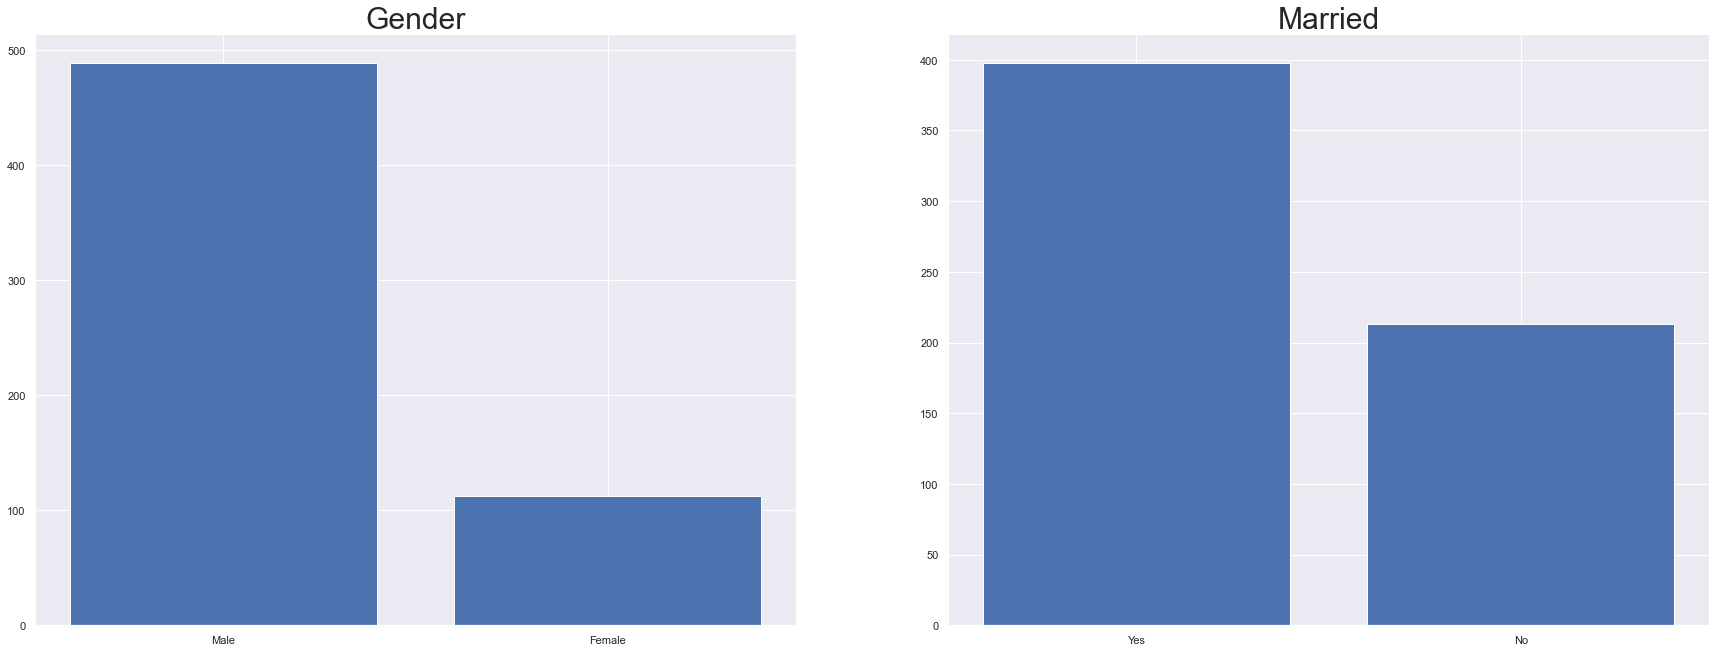

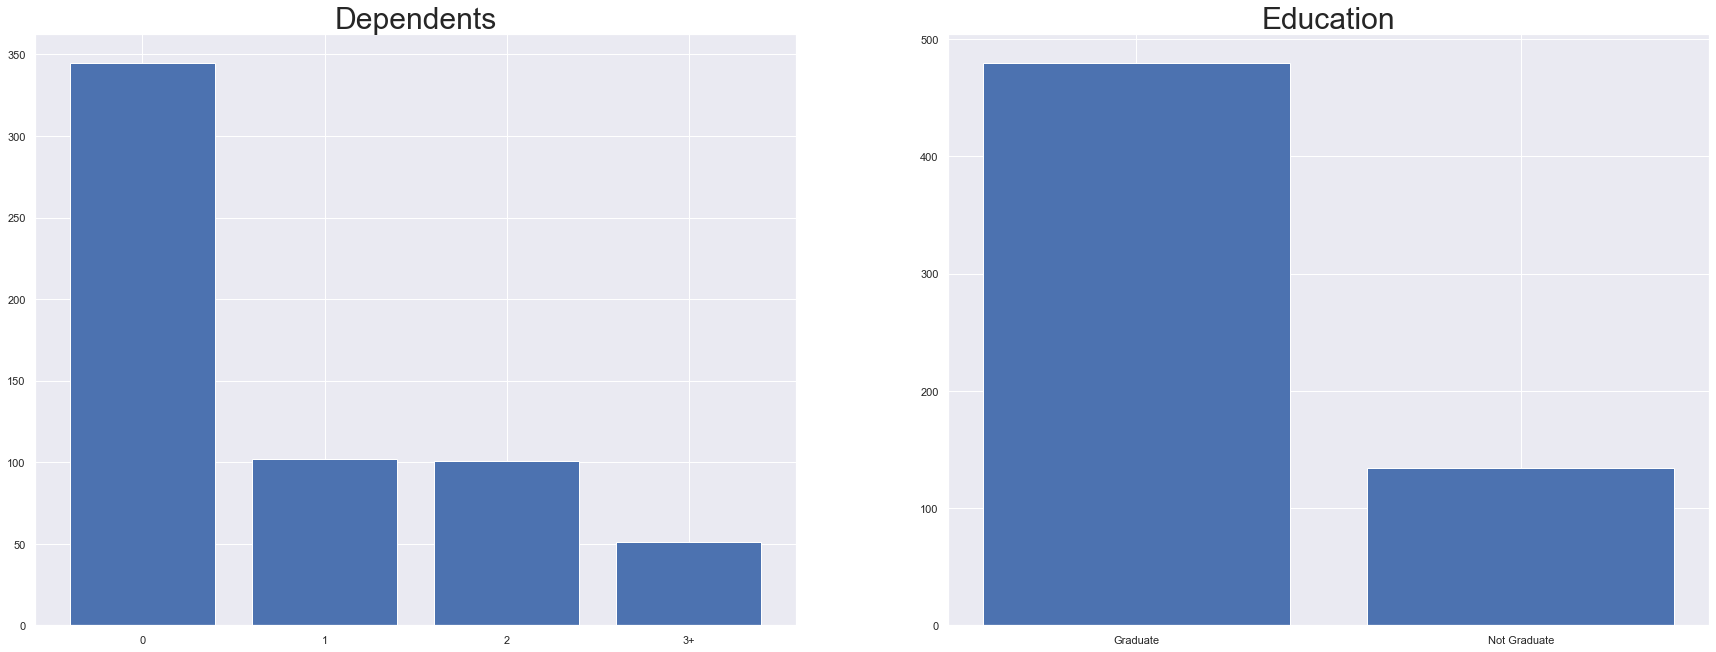

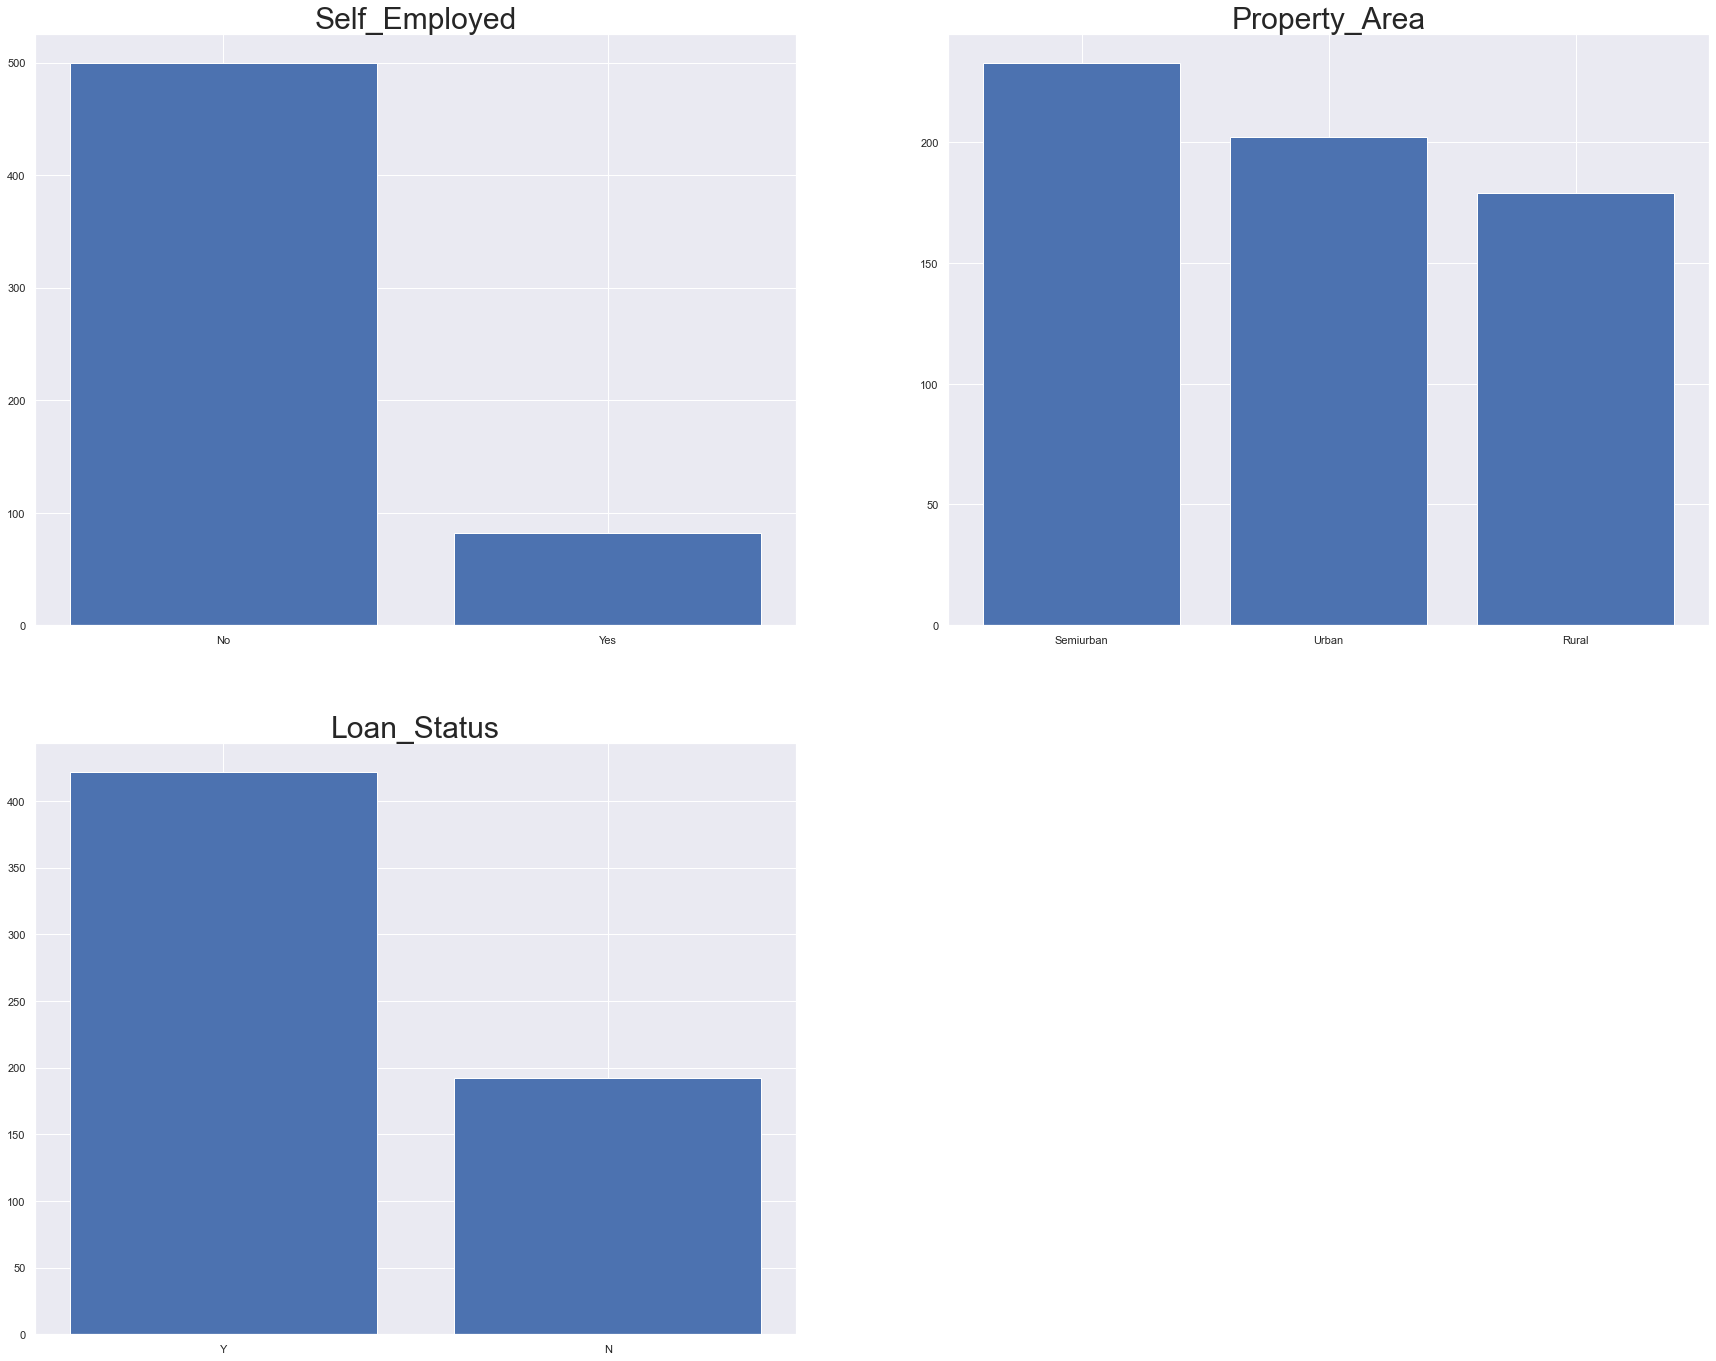

In [12]:
sns.set(rc = {'figure.figsize':(30,50)})
plt.subplot(4,2,1)
x = df['Gender'].value_counts().keys()
y = df['Gender'].value_counts()
plt.title('Gender', size = 30)
plt.bar(x,y)
plt.subplot(4,2,2)
x = df['Married'].value_counts().keys()
y = df['Married'].value_counts()
plt.title('Married', size = 30)
plt.bar(x,y)
plt.show()
plt.subplot(4,2,3)
x = df['Dependents'].value_counts().keys()
y = df['Dependents'].value_counts()
plt.title('Dependents', size = 30)
plt.bar(x,y)
plt.subplot(4,2,4)
x = df['Education'].value_counts().keys()
y = df['Education'].value_counts()
plt.title('Education', size = 30)
plt.bar(x,y)
plt.show()
plt.subplot(4,2,5)
x = df['Self_Employed'].value_counts().keys()
y = df['Self_Employed'].value_counts()
plt.title('Self_Employed', size = 30)
plt.bar(x,y)
plt.subplot(4,2,6)
x = df['Property_Area'].value_counts().keys()
y = df['Property_Area'].value_counts()
plt.title('Property_Area', size = 30)
plt.bar(x,y)
plt.subplot(4,2,7)
x = df['Loan_Status'].value_counts().keys()
y = df['Loan_Status'].value_counts()
plt.title('Loan_Status', size = 30)
plt.bar(x,y)
plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

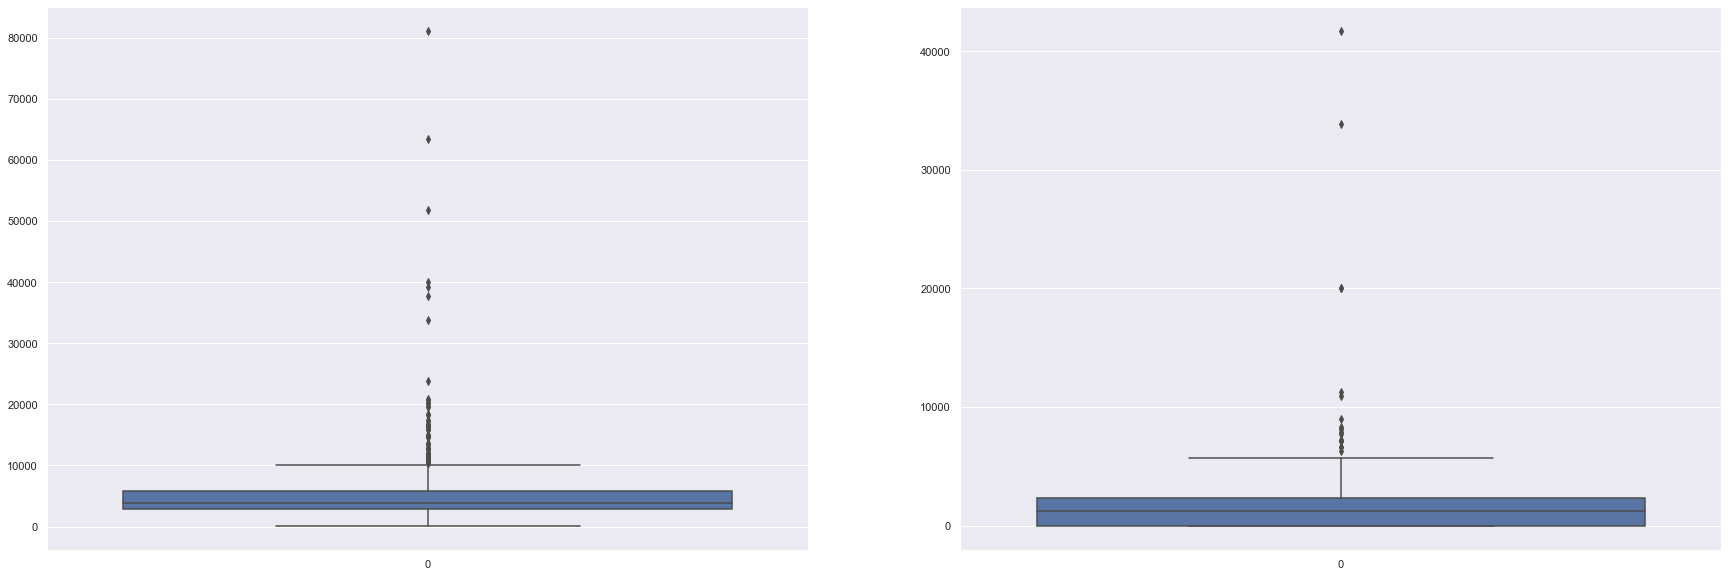

In [13]:
sns.set(rc = {'figure.figsize':(30,10)})
plt.subplot(1,2,1)
ax = sns.boxplot(data = Applicant_Income)
plt.subplot(1,2,2)
ax = sns.boxplot(data = Coapplicant_Income)

Look at the distribution of income segregated  by `Education`

In [14]:
stats = df.groupby(['Education']).mean()
stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,5857.433333,1717.474833,154.060215,344.669492,0.857788
Not Graduate,3777.283582,1276.544776,118.409449,332.156250,0.785124


In [15]:
stats = df.groupby(['Education']).median()
stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,4000.0,1059.0,132.0,360.0,1.0
Not Graduate,3357.5,1356.5,115.0,360.0,1.0


Look at the histogram and boxplot of LoanAmount

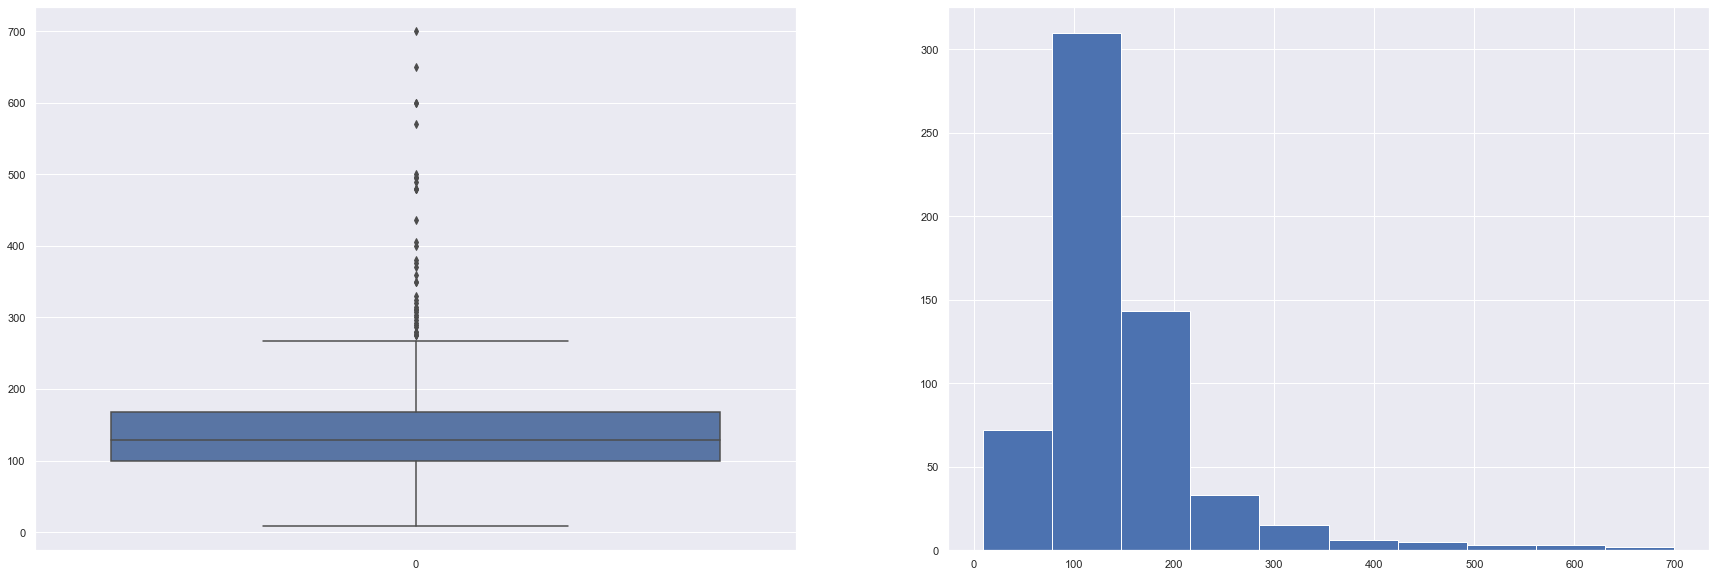

In [16]:
sns.set(rc = {'figure.figsize':(30,10)})
plt.subplot(1,2,1)
ax = sns.boxplot(data =df['LoanAmount'])
plt.subplot(1,2,2)
ax = plt.hist(df['LoanAmount'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.pivot_table('ApplicantIncome', index='Gender', columns='Dependents')

Dependents,0,1,2,3+
Gender,,,,
Female,4278.100000,6487.894737,4277.857143,1776.333333
Male,5119.848837,5793.280488,5015.456522,7719.777778


In [19]:
df.pivot_table('ApplicantIncome', index='Loan_Status', columns='Education')

Education,Graduate,Not Graduate
Loan_Status,,
N,6114.514286,3646.442308
Y,5751.576471,3860.256098


In [20]:
df.pivot_table('ApplicantIncome', index='Loan_Status', columns='Credit_History')

Credit_History,0.0,1.0
Loan_Status,,
N,5382.841463,5613.927835
Y,9153.857143,5378.436508


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [21]:
percent = df.isnull().sum().sort_values(ascending=False)/500000
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
Credit_History,50,0.000100
Self_Employed,32,0.000064
LoanAmount,22,0.000044
Dependents,15,0.000030
Loan_Amount_Term,14,0.000028
Gender,13,0.000026
Married,3,0.000006
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [22]:
missing_columns = missing_data[missing_data['Total'] > 0].index.tolist()
df.dtypes[missing_columns]

Credit_History      float64
Self_Employed        object
LoanAmount          float64
Dependents           object
Loan_Amount_Term    float64
Gender               object
Married              object
dtype: object

In [23]:
df['Credit_History'] = df['Credit_History'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Dependents'] = df['Dependents'].fillna('0')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('No')
df = df.drop(['Loan_ID'], axis = 1)

In [24]:
percent = df.isnull().sum().sort_values(ascending=False)/500000
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0


In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

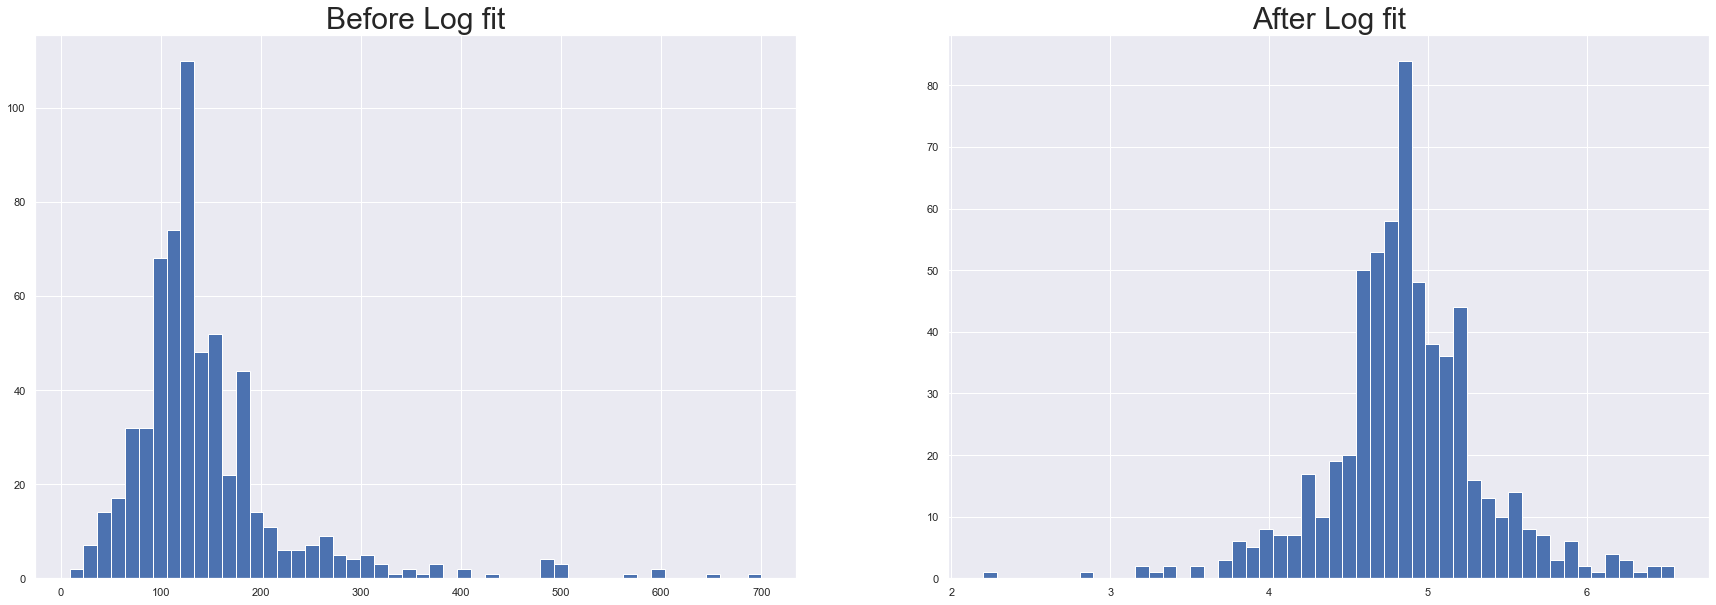

In [26]:
sns.set(rc = {'figure.figsize':(30,10)})
plt.subplot(1,2,1)
plt.hist(df['LoanAmount'], bins = 50)
plt.title('Before Log fit', size = 30)

plt.subplot(1,2,2)
data = df['LoanAmount'].values.reshape(-1,1)
data = np.log(data)
plt.hist(data, bins = 50)
plt.title('After Log fit', size = 30)
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [27]:
df['Incomes'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Incomes
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


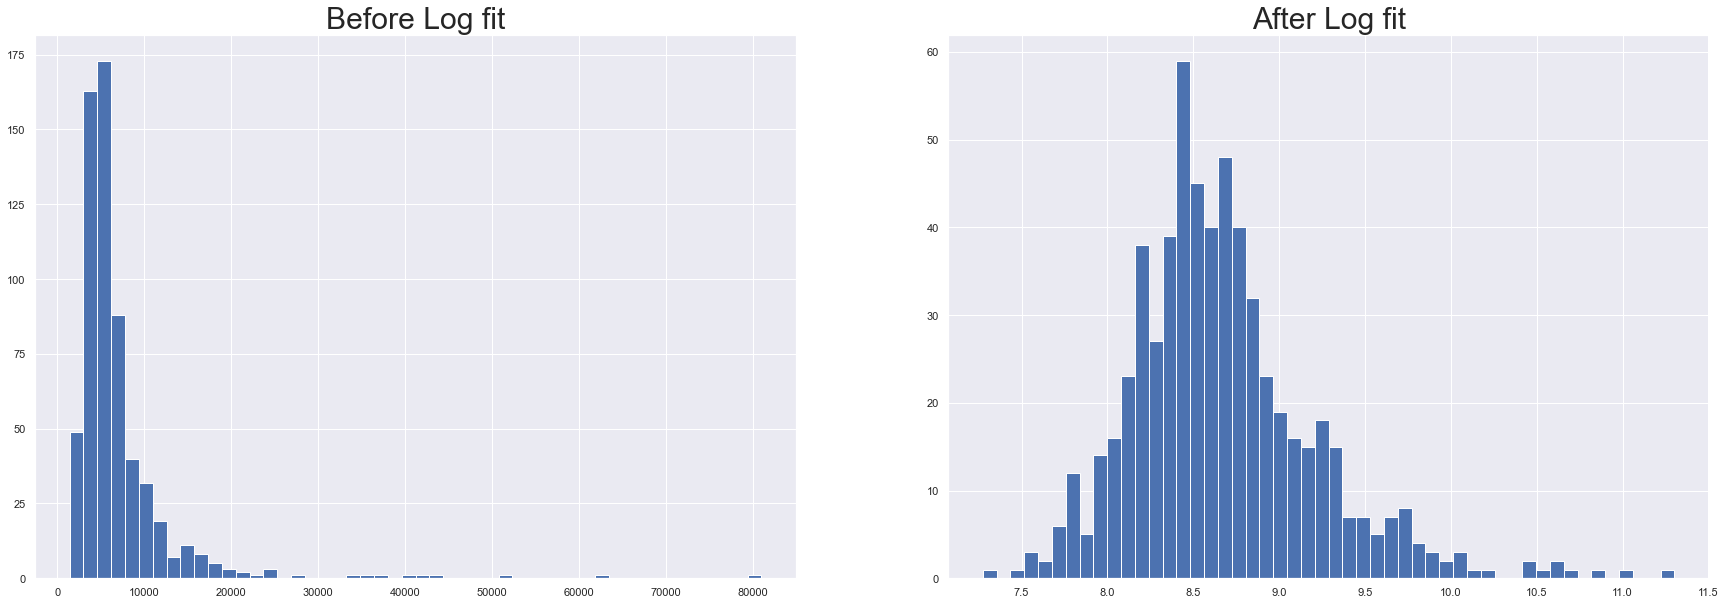

In [29]:
sns.set(rc = {'figure.figsize':(30,10)})
plt.subplot(1,2,1)
plt.hist(df['Incomes'], bins = 50)
plt.title('Before Log fit', size = 30)

plt.subplot(1,2,2)
data = df['Incomes'].values.reshape(-1,1)
data = np.log(data)
plt.hist(data, bins = 50)
plt.title('After Log fit', size = 30)
plt.show()

### I think adding this feature might be beneficial for the model and because I don't have time for many iterations I will add it to the model now

In [30]:
df['Income/LoanAmount_ratio'] = df['Incomes']/df['LoanAmount']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Incomes,Income/LoanAmount_ratio
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,45.695312
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,47.585938
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,45.454545
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,41.175000
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,42.553191


In [31]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
    
binary_cat = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for value in binary_cat:
    df[value + '_encoded'] = lb_make.fit_transform(df[value])

In [32]:
Dummy = pd.get_dummies(df[['Dependents', 'Property_Area']])
df = pd.concat([df, Dummy], axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,Education_encoded,Self_Employed_encoded,Loan_Status_encoded,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,...,0,0,1,1,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,...,0,0,0,0,1,0,0,1,0,0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,...,0,1,1,1,0,0,0,0,0,1
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,...,1,0,1,1,0,0,0,0,0,1
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,...,0,0,1,1,0,0,0,1,0,0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,...,0,0,1,0,0,0,1,1,0,0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,...,0,0,1,0,1,0,0,0,0,1
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,...,0,0,1,0,0,1,0,0,0,1


In [33]:
final_df = df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'], axis = 1)
final_df

,LoanAmount,Loan_Amount_Term,Credit_History,Incomes,Income/LoanAmount_ratio,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Loan_Status_encoded,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,5849.0,45.695312,1,0,0,0,1,1,0,0,0,0,0,1
1,128.0,360.0,1.0,6091.0,47.585938,1,1,0,0,0,0,1,0,0,1,0,0
2,66.0,360.0,1.0,3000.0,45.454545,1,1,0,1,1,1,0,0,0,0,0,1
3,120.0,360.0,1.0,4941.0,41.175000,1,1,1,0,1,1,0,0,0,0,0,1
4,141.0,360.0,1.0,6000.0,42.553191,1,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,2900.0,40.845070,0,0,0,0,1,1,0,0,0,1,0,0
610,40.0,180.0,1.0,4106.0,102.650000,1,1,0,0,1,0,0,0,1,1,0,0
611,253.0,360.0,1.0,8312.0,32.853755,1,1,0,0,1,0,1,0,0,0,0,1
612,187.0,360.0,1.0,7583.0,40.550802,1,1,0,0,1,0,0,1,0,0,0,1


In [34]:
final_df.dtypes

LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Incomes                    float64
Income/LoanAmount_ratio    float64
Gender_encoded               int32
Married_encoded              int32
Education_encoded            int32
Self_Employed_encoded        int32
Loan_Status_encoded          int32
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

## 4. Building a Predictive Model

In [35]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Loan_Status_encoded'], axis = 1)
y = final_df['Loan_Status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
print("X training shape : ", X_train.shape)
print("X test shape : ", X_test.shape )
print("y training shape :", y_train.shape )
print("y test shape :", y_test.shape )

X training shape :  (491, 16)
X test shape :  (123, 16)
y training shape : (491,)
y test shape : (123,)


Try paramater grid search to improve the results

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, column_names):

        self.column_names = column_names

    def fit(self, X, y = None):
        
        return self

    def transform(self, X, y = None):
        
        X = X.copy()  # Don't modify the original variable that was passed in
        X[self.column_names] = np.log(X[self.column_names])

        return X

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

sc = StandardScaler()
rf = RandomForestClassifier()
vs = VarianceThreshold()
lr = LogisticRegression()
sv = SVC()
log_transformer = LogTransformer(['Income/LoanAmount_ratio', 'Incomes', 'LoanAmount'])
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])


In [38]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ("log", log_transformer),
    ("scaler", sc),
    ('selector', vs),
    ("features", feature_union),
    ("classifier", rf)
])

parameters = {'scaler': [StandardScaler(), MinMaxScaler()],
	'selector__threshold': [0, 0.001, 0.01],
    "classifier" : [rf, lr, sv],
    'features__pca__n_components': [3, 5],
    'features__select_best__k': [1, 3, 6],
}

In [39]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=5, scoring = 'accuracy').fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.7494908350305499
Test set score: 0.8536585365853658


In [40]:
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.8536585365853658
Achieved with hyperparameters:
	 {'classifier': LogisticRegression(), 'features__pca__n_components': 3, 'features__select_best__k': 3, 'scaler': MinMaxScaler(), 'selector__threshold': 0}


In [41]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogTransformer(column_names=['Income/LoanAmount_ratio',
                                                                     'Incomes',
                                                                     'LoanAmount'])),
                                       ('scaler', StandardScaler()),
                                       ('selector', VarianceThreshold()),
                                       ('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('select_best',
                                                                        SelectKBest())])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier': [RandomForestClassifier(),
                                        LogisticRegression(), SVC()],
                         'features__pca__n_components': [3, 5],
                         'features__select_best__k': [1, 3, 6],
                         'scaler': [StandardScaler(), MinMaxScaler()],
                         'selector__threshold': [0, 0.001, 0.01]},
             scoring='accuracy')

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [42]:
from sklearn.metrics import accuracy_score
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.8536585365853658


In [43]:
test = final_df.iloc[0:1]
test = test.drop(['Loan_Status_encoded'], axis = 1)

In [51]:
grid.predict(test)

array([1])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [45]:
import pickle
filename = 'Loan_prediction.p'
pickle.dump(grid, open(filename, 'wb'))

In [46]:
test

,LoanAmount,Loan_Amount_Term,Credit_History,Incomes,Income/LoanAmount_ratio,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,5849.0,45.695312,1,0,0,0,1,0,0,0,0,0,1


In [53]:
#Sample data
json_data = {
    'LoanAmount' : 128.0,
    'Loan_Amount_Term' : 360.0,
    'Credit_History' : 1.0,
    'Incomes' : 5849.0,
    'Income/LoanAmount_ratio' : 45.695312,
    'Gender_encoded' : 1,
    'Married_encoded' : 0,
    'Education_encoded' : 0,
    'Self_Employed_encoded' : 0,
    'Dependents_0' : 1,
    'Dependents_1' : 0,
    'Dependents_2' : 0,
    'Dependents_3+' : 0,
    'Property_Area_Rural' : 0,
    'Property_Area_Semiurban' : 0,
    'Property_Area_Urban' :  1  
}

In [54]:
import requests
URL = "http://127.0.0.1:5000/Approval"
r = requests.post(url = URL, json = json_data) 

In [55]:
print(r.json())

[1]
